| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./4_Machine_Learning.ipynb)| [⏩](./6_Machine_Learning.ipynb)|

# **41. Análisis de componentes principales (PCA)**

**¿Qué es el Análisis de Componentes Principales (PCA)?**

El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que se utiliza para transformar un conjunto de datos en un nuevo sistema de coordenadas, donde las variables originales se expresan en términos de "componentes principales". Estos componentes son direcciones en las cuales los datos tienen la mayor varianza.

**Pasos Básicos de PCA:**

1. **Centrar los Datos:**
   - Restar la media de cada característica para centrar los datos.

2. **Calcular la Matriz de Covarianza:**
   - Calcular la matriz de covarianza de los datos centrados.

3. **Calcular Autovectores y Autovalores:**
   - Calcular los autovectores y autovalores de la matriz de covarianza.

4. **Ordenar Autovectores:**
   - Ordenar los autovectores según sus autovalores en orden descendente.

5. **Seleccionar Componentes Principales:**
   - Elegir los primeros $(m')$ autovectores como componentes principales.

6. **Proyectar los Datos:**
   - Proyectar los datos originales en el nuevo espacio definido por los autovectores seleccionados.

**Ejemplo en Código con Visualización:**

Vamos a aplicar PCA al conjunto de datos Iris y visualizar la proyección en un espacio bidimensional.

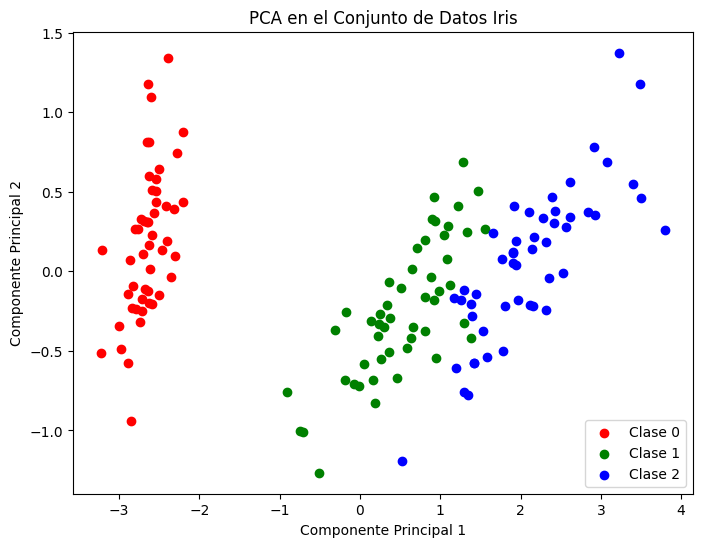

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Paso 1: Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Paso 2: Centrar los Datos
X_centered = X - np.mean(X, axis=0)

# Paso 3-5: Calcular Autovectores y Seleccionar Componentes Principales con scikit-learn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=f'Clase {i}')

plt.title('PCA en el Conjunto de Datos Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

En este ejemplo, utilizamos la implementación de PCA de scikit-learn. El conjunto de datos Iris se proyecta en un nuevo espacio bidimensional definido por los dos componentes principales. La visualización muestra cómo las clases se separan en el espacio de las dos primeras componentes principales. Las clases se distinguen claramente, lo que indica que las dos primeras componentes capturan la información esencial de los datos originales.

# **42. Regresión Lineal Simple**

**¿Qué es la Regresión Lineal Simple?**

La regresión lineal simple es un modelo estadístico que busca establecer la relación lineal entre una variable independiente (predictor) y una variable dependiente (respuesta). Se representa por la ecuación de una línea recta:

$y = mx + b$

donde:
- $(y)$ es la variable dependiente,
- $(x)$ es la variable independiente,
- $(m)$ es la pendiente de la línea, y
- $(b)$ es la ordenada al origen.

**Pasos Básicos para la Regresión Lineal Simple:**

1. **Preparación de Datos:**
   - Obtener el conjunto de datos con las variables $(x)$ e $(y)$.

2. **División de Datos:**
   - Dividir los datos en conjuntos de entrenamiento y prueba.

3. **Creación del Modelo:**
   - Crear un modelo de regresión lineal simple.

4. **Entrenamiento del Modelo:**
   - Entrenar el modelo utilizando el conjunto de entrenamiento.

5. **Predicción:**
   - Realizar predicciones utilizando el conjunto de prueba.

6. **Visualización:**
   - Visualizar la línea de regresión y los puntos de datos.

**Ejemplo en Código con Visualización:**

Vamos a realizar un ejemplo utilizando Python y la librería scikit-learn.

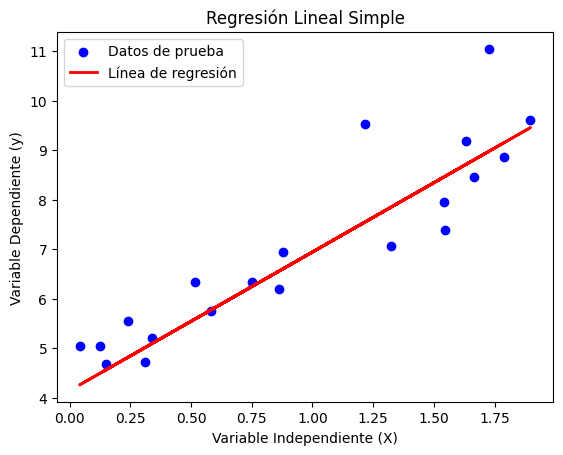

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Paso 1: Preparación de Datos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Paso 2: División de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Creación del Modelo
model = LinearRegression()

# Paso 4: Entrenamiento del Modelo
model.fit(X_train, y_train)

# Paso 5: Predicción
y_pred = model.predict(X_test)

# Paso 6: Visualización
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()

Este código genera datos de ejemplo, divide el conjunto de datos en entrenamiento y prueba, entrena un modelo de regresión lineal simple y visualiza la línea de regresión junto con los datos de prueba. La línea de regresión busca ajustarse a la relación lineal entre $(X)$ e $(y)$.

# **43. Regresión lineal simple | Formulación Matemática | Codificación desde cero**

**Formulación Matemática:**

La regresión lineal simple se representa matemáticamente por la ecuación de una línea recta:

$y = mx + b$

Donde:
- $(y)$ es la variable dependiente (respuesta),
- $(x)$ es la variable independiente (predictor),
- $(m)$ es la pendiente de la línea, y
- $(b)$ es la ordenada al origen.

El objetivo es encontrar los valores de $(m)$ y $(b)$ que minimicen la suma de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales de la variable dependiente.

**Pasos Básicos:**

1. **Inicialización de Parámetros:**
   - Inicializar $(m)$ y $(b)$ con valores aleatorios o ceros.

2. **Cálculo de Predicciones:**
   - Utilizar la ecuación de regresión para calcular las predicciones del modelo.

3. **Cálculo del Error:**
   - Calcular el error como la diferencia entre las predicciones y los valores reales.

4. **Cálculo de Gradientes:**
   - Calcular los gradientes de $(m)$ y $(b)$ con respecto al error.

5. **Actualización de Parámetros:**
   - Actualizar $(m)$ y $(b)$ utilizando los gradientes y un factor de aprendizaje.

6. **Iteración:**
   - Repetir los pasos 2-5 hasta convergencia o un número fijo de iteraciones.

**Ejemplo en Código:**

Vamos a implementar la regresión lineal simple desde cero utilizando Python.

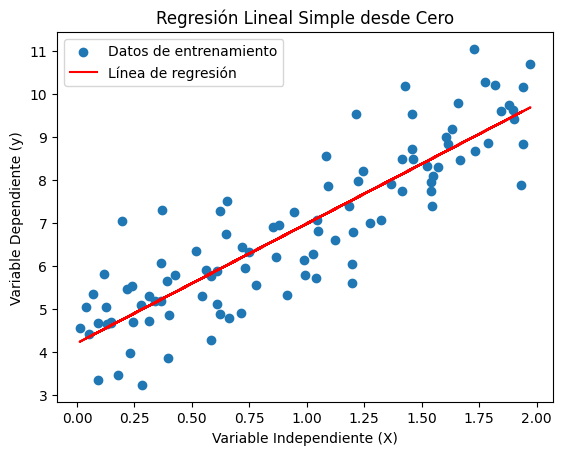

Pendiente (m): 2.7755308615708514
Ordenada al origen (b): 4.208960473926773


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Inicialización de parámetros
m = np.random.randn()
b = np.random.randn()

# Hiperparámetros
learning_rate = 0.01
n_iterations = 1000

# Entrenamiento del modelo
for iteration in range(n_iterations):
    # Cálculo de predicciones
    y_pred = m * X + b
    
    # Cálculo del error
    error = y_pred - y
    
    # Cálculo de gradientes
    gradient_m = 2 * np.mean(error * X)
    gradient_b = 2 * np.mean(error)
    
    # Actualización de parámetros
    m -= learning_rate * gradient_m
    b -= learning_rate * gradient_b

# Visualización
plt.scatter(X, y, label='Datos de entrenamiento')
plt.plot(X, m * X + b, 'r-', label='Línea de regresión')
plt.xlabel('Variable Independiente (X)')
plt.ylabel('Variable Dependiente (y)')
plt.title('Regresión Lineal Simple desde Cero')
plt.legend()
plt.show()

print(f"Pendiente (m): {m}")
print(f"Ordenada al origen (b): {b}")

Este código implementa la regresión lineal simple desde cero, entrenando el modelo para ajustarse a los datos de ejemplo y visualizando la línea de regresión resultante. La pendiente $(m)$ y la ordenada al origen $(b)$ se actualizan mediante el descenso de gradiente para minimizar el error.

# **44. Métricas de regresión | MSE, MAE y RMSE | Puntuación R2 y puntuación R2 ajustada**

**Métricas de Regresión: MSE, MAE, RMSE, R² y R² Ajustado**

En la evaluación de modelos de regresión, es fundamental utilizar métricas que cuantifiquen la calidad del ajuste del modelo a los datos. Aquí, exploraremos algunas de las métricas más comunes:

1. **Error Cuadrático Medio (MSE - Mean Squared Error):**
   - MSE mide la media de los cuadrados de los errores entre las predicciones y los valores reales. Cuanto más bajo sea el MSE, mejor será el modelo.

   $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

2. **Error Absoluto Medio (MAE - Mean Absolute Error):**
   - MAE mide la media de las magnitudes absolutas de los errores. Es menos sensible a valores atípicos que el MSE.

   $MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$

3. **Raíz Cuadrada del Error Cuadrático Medio (RMSE):**
   - RMSE es la raíz cuadrada del MSE y tiene la misma interpretación que la variable dependiente. Es especialmente útil para interpretar la magnitud de los errores en la misma escala que la variable de respuesta.

   $RMSE = \sqrt{MSE}$

4. **Coeficiente de Determinación (R² - R-squared):**
   - R² cuantifica la proporción de la varianza en la variable de respuesta que es predecible a partir de las variables independientes. R² varía entre 0 y 1, donde 1 indica un ajuste perfecto.

   $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

5. **Coeficiente de Determinación Ajustado (R² Ajustado):**
   - R² ajustado incorpora el número de predictores en el modelo, penalizando modelos con un mayor número de predictores. Es útil al comparar modelos con diferentes números de predictores.

   $R^2_{\text{ajustado}} = 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1}$

   Donde $(n)$ es el número de observaciones y $(k)$ es el número de predictores.

**Ejemplo en Código y Visualización:**

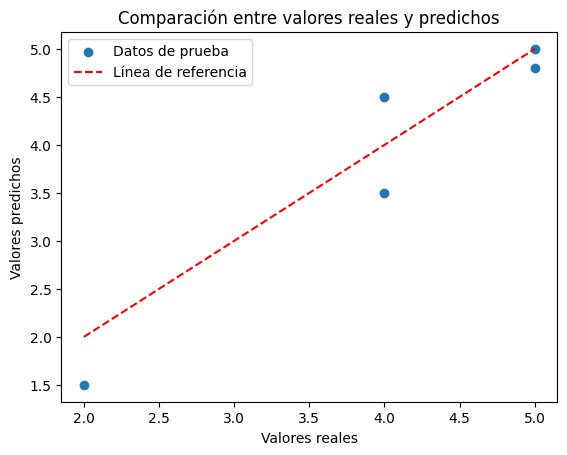

MSE: 0.158
MAE: 0.34
RMSE: 0.39749213828703583
R²: 0.8683333333333333


In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
y_true = np.array([2, 4, 5, 4, 5])
y_pred = np.array([1.5, 3.5, 5, 4.5, 4.8])

# Calcular métricas
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Visualización
plt.scatter(y_true, y_pred, label='Datos de prueba')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Comparación entre valores reales y predichos')
plt.legend()
plt.show()

# Mostrar métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

Este código utiliza datos de ejemplo para calcular y visualizar las métricas de regresión. La gráfica de dispersión compara los valores reales con los predichos, y las métricas se imprimen para evaluar la calidad del modelo.

# **45. Regresión lineal múltiple | Intuición geométrica y código**

La regresión lineal múltiple es una extensión de la regresión lineal simple, donde se utilizan múltiples variables independientes para predecir una variable dependiente. La forma general de la regresión lineal múltiple es:

$y = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n + \varepsilon$

Donde:
- $(y)$ es la variable dependiente.
- $(b_0)$ es el intercepto.
- $(b_1, b_2, \ldots, b_n)$ son los coeficientes de las variables independientes $(x_1, x_2, \ldots, x_n)$.
- $(\varepsilon)$ es el término de error.

**Intuición Geométrica:**

En el caso de la regresión lineal simple, visualizamos una línea en un espacio bidimensional. En la regresión lineal múltiple, estamos trabajando en un espacio tridimensional o de dimensiones superiores. Cada variable independiente contribuye con una dimensión adicional al espacio.

**Ejemplo en Código y Visualización:**

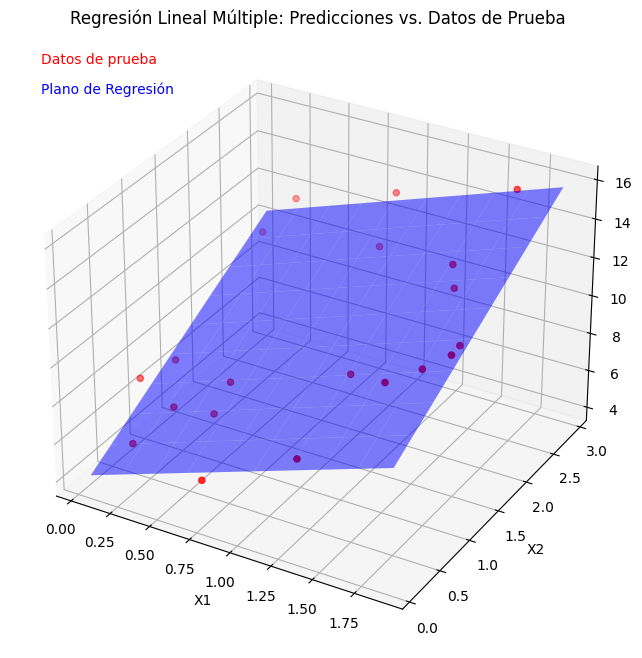

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generar datos de ejemplo
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(np.concatenate([X1, X2], axis=1), y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Visualización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='red', label='Datos de prueba')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Regresión Lineal Múltiple: Predicciones vs. Datos de Prueba')

# Crear una malla para visualizar el plano de regresión
x1_range = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 10)
x2_range = np.linspace(min(X_test[:, 1]), max(X_test[:, 1]), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_mesh = model.predict(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])
y_pred_mesh = y_pred_mesh.reshape(x1_mesh.shape)
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, alpha=0.5, color='blue', label='Plano de Regresión')

# Agregar leyenda manualmente
ax.text2D(0.05, 0.95, "Datos de prueba", color="red", transform=ax.transAxes)
ax.text2D(0.05, 0.90, "Plano de Regresión", color="blue", transform=ax.transAxes)

plt.show()

Este código genera datos de ejemplo con dos variables independientes $(X_1)$ y $(X_2)$ y una variable dependiente $(y)$. Luego, entrena un modelo de regresión lineal múltiple y visualiza las predicciones en un espacio tridimensional. El plano de regresión se representa como una superficie en el espacio 3D. La visualización ayuda a comprender cómo el modelo se ajusta a los datos en múltiples dimensiones.

# **46. Regresión lineal múltiple | Formulación matemática desde cero**

La regresión lineal múltiple es una extensión de la regresión lineal simple, que permite modelar la relación entre múltiples variables independientes y una variable dependiente. La formulación matemática básica para la regresión lineal múltiple es:

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon$

Donde:
- $(y)$ es la variable dependiente.
- $(\beta_0)$ es la intersección o término de sesgo.
- $(\beta_1, \beta_2, \ldots, \beta_n)$ son los coeficientes de las variables independientes $(x_1, x_2, \ldots, x_n)$ respectivamente.
- $(\epsilon)$ es el término de error.

El objetivo de la regresión lineal múltiple es encontrar los valores de $(\beta_0, \beta_1, \ldots, \beta_n)$ que minimizan la suma de los cuadrados de los errores (mínimos cuadrados).

Vamos a implementar esto desde cero en Python y visualizar el resultado. Usaremos datos sintéticos para ilustrar el concepto:

Coeficientes:
[[3.91061004]
 [2.82913734]
 [2.23977047]]


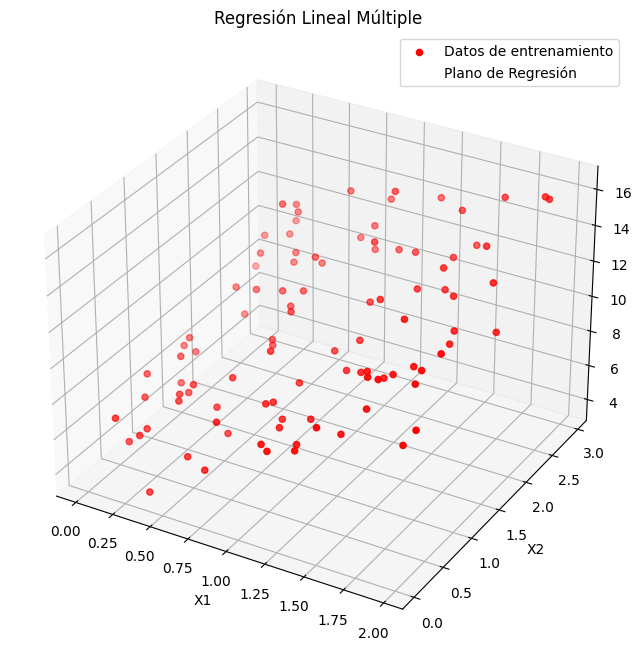

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)

# Agregar el término de sesgo a las características
X_b = np.c_[np.ones((100, 1)), X1, X2]

# Calcular los coeficientes usando la fórmula matricial
coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Mostrar los coeficientes
print("Coeficientes:")
print(coefficients)

# Predicciones en un rango de valores
x1_range = np.linspace(min(X1), max(X1), 100).reshape(-1, 1)
x2_range = np.linspace(min(X2), max(X2), 100).reshape(-1, 1)
X_new = np.c_[np.ones((100, 1)), x1_range, x2_range]
y_pred = X_new.dot(coefficients)

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='red', label='Datos de entrenamiento')
ax.plot_surface(x1_range, x2_range, y_pred.reshape(100, -1), alpha=0.5, color='blue', label='Plano de Regresión')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Regresión Lineal Múltiple')

plt.legend()
plt.show()

En este código, generamos datos sintéticos, agregamos el término de sesgo a las características, calculamos los coeficientes usando la fórmula matricial y realizamos predicciones en un rango de valores. La visualización 3D muestra los datos de entrenamiento en rojo y el plano de regresión en azul. Este es un ejemplo básico para ilustrar el concepto; en aplicaciones del mundo real, se utilizarían bibliotecas de aprendizaje automático como scikit-learn para simplificar este proceso.

# **47. Descenso de gradiente desde cero | Descenso de gradiente de extremo a extremo | Animación de descenso de degradado**

Entender el descenso de gradiente desde cero implica comprender cómo funciona el algoritmo básico detrás de la optimización en el aprendizaje automático. A continuación, te proporcionaré una explicación detallada junto con un ejemplo en código y una animación.

**Descenso de Gradiente:**

El descenso de gradiente es un algoritmo de optimización utilizado para minimizar una función de pérdida al ajustar iterativamente los parámetros del modelo. Se basa en la idea de encontrar la dirección en la cual la función de pérdida disminuye más rápidamente y ajustar los parámetros en esa dirección.

**Pasos del Descenso de Gradiente:**

1. **Inicialización de Parámetros:** Comenzamos con valores iniciales para los parámetros del modelo.
2. **Cálculo del Gradiente:** Calculamos el gradiente de la función de pérdida con respecto a los parámetros.
3. **Actualización de Parámetros:** Ajustamos los parámetros en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje.
4. **Iteración:** Repetimos los pasos 2 y 3 hasta que la función de pérdida converge o se alcanza un número predeterminado de iteraciones.

**Ejemplo en Código:**

Supongamos que queremos minimizar la función de pérdida cuadrática $L(w) = w^2$ usando descenso de gradiente.

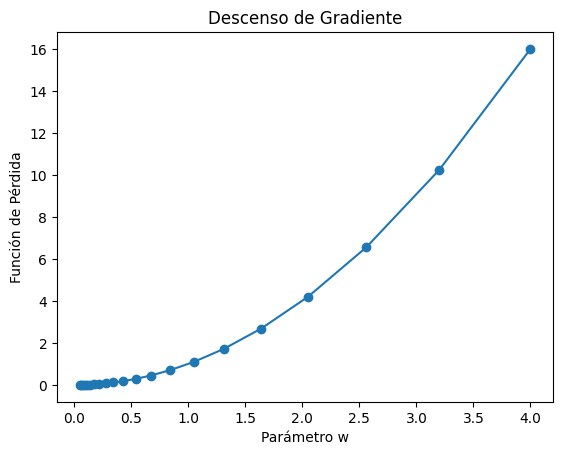

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida
def loss_function(w):
    return w**2

# Gradiente de la función de pérdida
def gradient(w):
    return 2 * w

# Descenso de gradiente desde cero
def gradient_descent(initial_w, learning_rate, num_iterations):
    w_values = [initial_w]
    for _ in range(num_iterations):
        current_w = w_values[-1]
        updated_w = current_w - learning_rate * gradient(current_w)
        w_values.append(updated_w)
    return w_values

# Configuración
initial_w = 4.0
learning_rate = 0.1
num_iterations = 20

# Ejecutar descenso de gradiente
w_values = gradient_descent(initial_w, learning_rate, num_iterations)

# Visualización
plt.plot(w_values, loss_function(np.array(w_values)), marker='o')
plt.title('Descenso de Gradiente')
plt.xlabel('Parámetro w')
plt.ylabel('Función de Pérdida')
plt.show()

Este código crea una animación que muestra cómo evoluciona el algoritmo de descenso de gradiente a lo largo de las iteraciones.

Espero que esto aclare el concepto del descenso de gradiente desde cero. Si tienes alguna pregunta o necesitas más aclaraciones, no dudes en preguntar.

# **48. Descenso de gradiente por lotes**

El descenso de gradiente por lotes (Batch Gradient Descent) es una técnica de optimización utilizada en el aprendizaje automático para minimizar una función de pérdida. A diferencia del descenso de gradiente estocástico, que actualiza los parámetros del modelo después de cada ejemplo de entrenamiento, el descenso de gradiente por lotes utiliza todo el conjunto de datos de entrenamiento en cada iteración para calcular el gradiente y actualizar los parámetros. Aquí hay una explicación detallada con ejemplos en código y visualización.

**Descenso de Gradiente por Lotes: Explicación Detallada**

1. **Función de Pérdida:**
   Supongamos que estamos tratando de minimizar una función de pérdida cuadrática, que es común en problemas de regresión. La función de pérdida es típicamente de la forma $J(w) = \frac{1}{2m}\sum_{i=1}^{m}(h_w(x^{(i)}) - y^{(i)})^2$, donde $(m)$ es el número de ejemplos de entrenamiento, $h_w(x^{(i)})$ es la predicción del modelo para el ejemplo $(i)$, y $(y^{(i)})$ es la etiqueta real.

2. **Gradiente:**
   El gradiente de la función de pérdida con respecto a los parámetros $(w)$ se calcula para indicar la dirección y la magnitud del cambio necesario para minimizar la pérdida. En el caso de la función de pérdida cuadrática, el gradiente es $(\nabla J(w) = \frac{1}{m}\sum_{i=1}^{m}(h_w(x^{(i)}) - y^{(i)}) \cdot x^{(i)})$.

3. **Actualización de Parámetros:**
   La actualización de los parámetros se realiza utilizando la regla de actualización: $(w := w - \alpha \cdot \nabla J(w))$, donde $(\alpha)$ es la tasa de aprendizaje.

4. **Iteración:**
   Se repiten las iteraciones hasta que la convergencia o un número fijo de iteraciones se alcanza.

**Ejemplo en Código con Visualización**

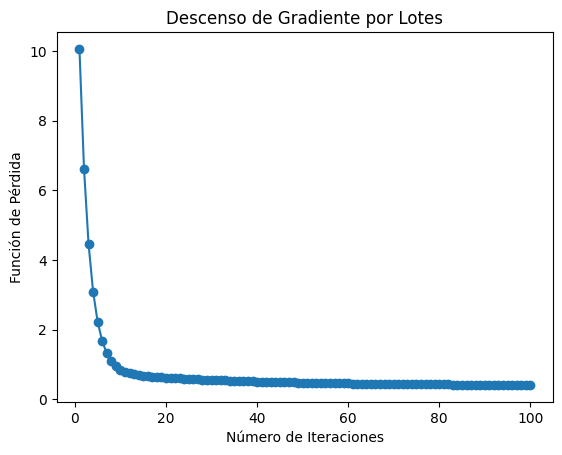

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Agregar el término de sesgo a X
X_b = np.c_[np.ones((100, 1)), X]

# Función de pérdida cuadrática
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Descenso de gradiente por lotes
def batch_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Inicializar parámetros
theta_initial = np.random.randn(2, 1)

# Configuración del descenso de gradiente
learning_rate = 0.1
num_iterations = 100

# Ejecutar descenso de gradiente
theta_optimal, cost_history = batch_gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations)

# Visualización
plt.plot(range(1, num_iterations + 1), cost_history, marker='o')
plt.title('Descenso de Gradiente por Lotes')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Función de Pérdida')
plt.show()

En este ejemplo, generamos datos de ejemplo, inicializamos los parámetros, y ejecutamos el descenso de gradiente por lotes. La visualización muestra cómo la función de pérdida disminuye con el número de iteraciones. A medida que el descenso de gradiente progresa, los parámetros se ajustan para minimizar la pérdida y mejorar el rendimiento del modelo.

# **49. Descenso del gradiente estocástico**

El descenso de gradiente estocástico (SGD, por sus siglas en inglés) es una técnica de optimización utilizada en el aprendizaje automático para minimizar una función de pérdida. A diferencia del descenso de gradiente por lotes, que utiliza el conjunto de datos completo en cada iteración, el SGD actualiza los parámetros del modelo después de cada ejemplo de entrenamiento. Aquí tienes una explicación detallada con ejemplos en código y visualización.

**Descenso de Gradiente Estocástico: Explicación Detallada**

1. **Función de Pérdida:**
   Supongamos que estamos tratando de minimizar una función de pérdida cuadrática, común en problemas de regresión. La función de pérdida es típicamente de la forma $J(w) = \frac{1}{2}(h_w(x^{(i)}) - y^{(i)})^2$, donde $h_w(x^{(i)})$ es la predicción del modelo para el ejemplo $(i)$ y $y^{(i)}$ es la etiqueta real.

2. **Gradiente:**
   El gradiente de la función de pérdida con respecto a los parámetros $(w)$ se calcula para indicar la dirección y la magnitud del cambio necesario para minimizar la pérdida. En el caso de la función de pérdida cuadrática, el gradiente es $\nabla J(w) = (h_w(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$.

3. **Actualización de Parámetros:**
   La actualización de los parámetros se realiza después de cada ejemplo de entrenamiento utilizando la regla de actualización: $w := w - \alpha \cdot \nabla J(w)$, donde $(\alpha)$ es la tasa de aprendizaje.

4. **Iteración:**
   Se repiten las iteraciones hasta que la convergencia o un número fijo de iteraciones se alcanza.

**Ejemplo en Código con Visualización**

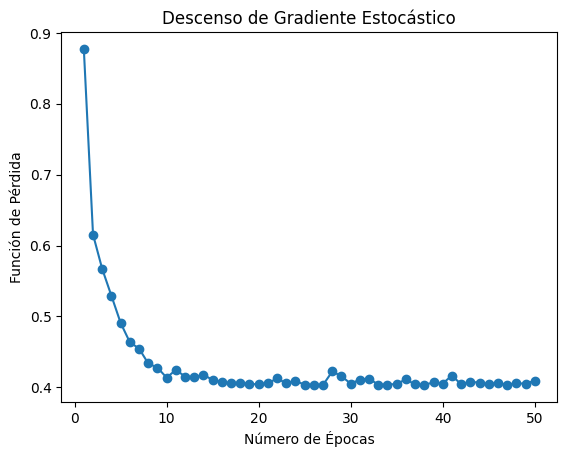

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Agregar el término de sesgo a X
X_b = np.c_[np.ones((100, 1)), X]

# Función de pérdida cuadrática
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / 2) * np.mean(np.square(predictions - y))
    return cost

# Descenso de gradiente estocástico
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    cost_history = []

    for epoch in range(num_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            prediction = xi.dot(theta)
            error = prediction - yi
            gradient = xi.T.dot(error)
            theta -= learning_rate * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Inicializar parámetros
theta_initial = np.random.randn(2, 1)

# Configuración del descenso de gradiente estocástico
learning_rate = 0.01
num_epochs = 50

# Ejecutar descenso de gradiente estocástico
theta_optimal, cost_history = stochastic_gradient_descent(X_b, y, theta_initial, learning_rate, num_epochs)

# Visualización
plt.plot(range(1, num_epochs + 1), cost_history, marker='o')
plt.title('Descenso de Gradiente Estocástico')
plt.xlabel('Número de Épocas')
plt.ylabel('Función de Pérdida')
plt.show()

En este ejemplo, generamos datos de ejemplo, inicializamos los parámetros, y ejecutamos el descenso de gradiente estocástico. La visualización muestra cómo la función de pérdida disminuye con el número de épocas. A medida que el SGD progresa, los parámetros se ajustan para minimizar la pérdida y mejorar el rendimiento del modelo.

# **50. Descenso de gradiente de mini lotes**

El descenso de gradiente de mini lotes es una variante del descenso de gradiente que combina las características del descenso de gradiente por lotes y del descenso de gradiente estocástico. En lugar de utilizar el conjunto de datos completo o un solo ejemplo para actualizar los parámetros, el descenso de gradiente de mini lotes utiliza un pequeño conjunto de datos (mini lote) en cada iteración. Esto permite beneficiarse de la eficiencia computacional del descenso de gradiente por lotes y de la convergencia más rápida del descenso de gradiente estocástico. A continuación, encontrarás una explicación detallada con ejemplos en código y visualización.

**Descenso de Gradiente de Mini Lotes: Explicación Detallada**

1. **Función de Pérdida:**
   Al igual que en el descenso de gradiente estocástico, se utiliza una función de pérdida que queremos minimizar. Ejemplos de funciones de pérdida comunes incluyen la pérdida cuadrática para problemas de regresión y la pérdida de entropía cruzada para problemas de clasificación.

2. **Gradiente:**
   El gradiente se calcula como en el descenso de gradiente estocástico, utilizando un pequeño conjunto de datos (mini lote) en lugar del conjunto de datos completo. El gradiente indica la dirección y magnitud del cambio necesario para minimizar la pérdida.

3. **Actualización de Parámetros:**
   Los parámetros del modelo se actualizan utilizando el gradiente del mini lote. La regla de actualización es similar a la del descenso de gradiente estocástico: \(w := w - \alpha \cdot \nabla J(w)\), donde \(\alpha\) es la tasa de aprendizaje.

4. **Iteración:**
   Se realizan múltiples iteraciones sobre mini lotes de datos hasta que se alcanza la convergencia o se completa un número fijo de iteraciones.

**Ejemplo en Código con Visualización**

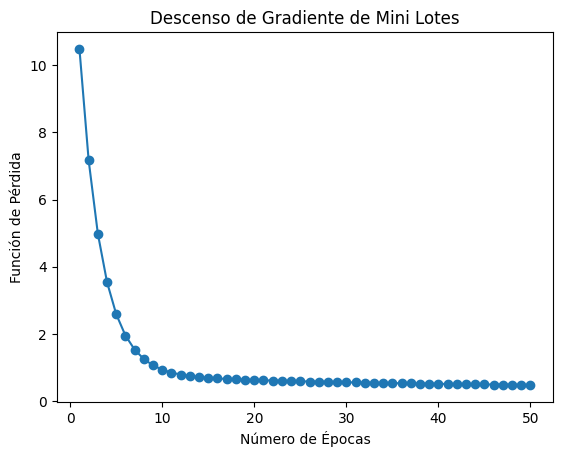

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pérdida cuadrática
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / 2) * np.mean(np.square(predictions - y))
    return cost

# Descenso de gradiente de mini lotes
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size):
    m = len(y)
    cost_history = []

    for epoch in range(num_epochs):
        for i in range(0, m, batch_size):
            xi = X[i:i+batch_size]
            yi = y[i:i+batch_size]
            predictions = xi.dot(theta)
            errors = predictions - yi
            gradient = xi.T.dot(errors) / batch_size
            theta -= learning_rate * gradient

        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Agregar el término de sesgo a X
X_b = np.c_[np.ones((100, 1)), X]

# Inicializar parámetros
theta_initial = np.random.randn(2, 1)

# Configuración del descenso de gradiente de mini lotes
learning_rate = 0.01
num_epochs = 50
batch_size = 10

# Ejecutar descenso de gradiente de mini lotes
theta_optimal, cost_history = mini_batch_gradient_descent(X_b, y, theta_initial, learning_rate, num_epochs, batch_size)

# Visualización
plt.plot(range(1, num_epochs + 1), cost_history, marker='o')
plt.title('Descenso de Gradiente de Mini Lotes')
plt.xlabel('Número de Épocas')
plt.ylabel('Función de Pérdida')
plt.show()

En este ejemplo, generamos datos de ejemplo, inicializamos los parámetros y ejecutamos el descenso de gradiente de mini lotes. La visualización muestra cómo la función de pérdida disminuye con el número de épocas. A medida que el descenso de gradiente de mini lotes progresa, los parámetros se ajustan para minimizar la pérdida y mejorar el rendimiento del modelo.

| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./4_Machine_Learning.ipynb)| [⏩](./6_Machine_Learning.ipynb)|